In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
pd.set_option('max_columns',None)

In [2]:
data = pd.read_csv('bankruptcy.csv')

In [3]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.8

In [4]:
data['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [5]:
import matplotlib.pyplot as plt

In [6]:
results = data['Bankrupt?'].value_counts()

In [7]:
results

0    6599
1     220
Name: Bankrupt?, dtype: int64

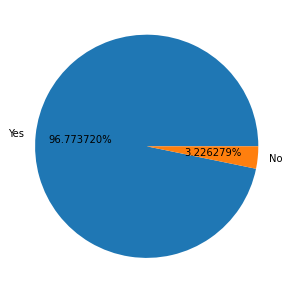

In [8]:
plt.figure(figsize  = (5,6))
plt.pie(results,autopct = '%2f%%',labels = { 'Yes' : 0,'No' : 1})
plt.show()

In [9]:
data.isna().sum()

Bankrupt?                                                              0
 ROA(C) before interest and depreciation before interest               0
 ROA(A) before interest and % after tax                                0
 ROA(B) before interest and depreciation after tax                     0
 operating gross margin                                                0
                                                                      ..
liability to equity                                                    0
Degree of financial leverage (DFL)                                     0
Interest coverage ratio( Interest expense to EBIT )                    0
one if net income was negative for the last two year zero otherwise    0
equity to liability                                                    0
Length: 96, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

In [11]:
data.isna().sum().sum()

0

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
def preprocessing_inputs(df):
    df = df.copy()
    # 
    df = df.drop(['one if net income was negative for the last two year zero otherwise'], axis = 'columns')
    # split df into X,y
    y = df['Bankrupt?']
    X = df.drop(['Bankrupt?'],axis = 'columns')
    # train data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns)
    X_test =  pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
    return X_train,X_test,y_train,y_test

In [15]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [16]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),equity to liability
1841,-1.696213,-1.779998,-1.823217,-0.182498,-0.178738,0.007627,-0.006701,-0.006119,-0.034461,-0.009632,-0.612346,-0.752362,-0.265269,-0.154301,-0.830311,-0.801997,-0.799163,-0.800091,-1.218105,-0.293990,-0.019151,-0.812609,-1.041750,-0.028425,-0.025540,-0.049986,-0.049779,-0.017692,-0.278656,-0.015341,-0.173666,-0.120506,-0.013541,-0.021444,-0.046053,-0.02658,-0.358892,0.358892,-0.097105,-0.092573,-0.045873,-0.812486,-1.110906,-0.144849,0.094803,-0.042665,-0.037952,-0.666033,-0.405972,-0.163678,-0.013541,-0.463558,-0.034626,0.249844,0.270024,-0.127941,-0.788496,-0.019093,-0.072951,-0.510826,-0.277634,-0.030542,-0.092543,-0.548116,0.066563,-0.188133,-0.098294,-0.849402,-0.036139,1.820541,-0.426385,-0.644230,-0.020630,-0.546287,-0.025352,-0.013541,-0.548116,-0.188133,0.000032,-2.416592,-1.035437,-0.302742,-1.591648,-0.354153,-0.033183,-1.824934,-0.048446,-0.013071,-0.182425,-0.432270,-0.167988,-0.051000,-0.053006,-0.145610
4991,-0.757324,-0.940200,-0.804221,-0.717338,-0.717107,0.008386,0.006209,0.007174,-0.011642,0.005678,-0.612346,2.000266,-0.386792,-0.154301,-0.830311,-0.393478,-0.391717,-0.392730,-0.747846,-0.368125,-0.019151,-0.812609,-0.711681,-0.035873,-0.008827,-0.006153,-0.006134,-0.008693,0.082208,-0.015341,-0.206327,-0.177006,-0.013541,-0.021444,-0.032666,-0.02658,-0.426521,0.426521,-0.134430,

In [17]:
X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),equity to liability
5346,-0.868210,-0.661388,-0.815582,-0.500379,-0.499708,0.016666,0.008880,0.009740,-0.029777,0.008136,1.453260,0.379488,-0.264109,-0.154301,-0.830311,-0.124880,-0.123825,-0.124893,-0.623790,-0.181665,-0.019151,-0.295133,-0.598580,-0.028656,0.000277,-0.019130,-0.019056,-0.010984,0.120376,-0.015341,-0.067609,0.067520,-0.013541,-0.021444,-0.067267,-0.02658,-0.237388,0.237388,-0.072603,-0.036059,-0.027018,-0.294286,-0.626537,-0.059455,-0.365032,-0.042665,-0.037952,-0.666033,-0.405972,-0.340198,-0.013541,-0.102600,-0.034626,0.041437,0.604336,0.214052,0.114560,-0.019093,-0.072951,0.239579,-0.228323,-0.027145,-0.092543,0.933368,0.017735,-0.077287,-0.098294,-0.254495,-0.031826,-0.237156,-0.426385,-0.644230,-0.017787,-0.841960,-0.009186,-0.013541,0.933368,-0.077287,-0.249399,0.414567,0.128197,-0.192695,0.289243,-0.113016,-0.033183,-0.547661,-0.048446,0.053591,-0.500509,-0.110705,-0.145800,-0.055401,-0.089776,-0.204394
3693,1.359223,0.989654,1.159488,1.631666,1.636669,0.027505,0.036800,0.034529,-0.006334,0.033027,-0.612346,-0.752362,-0.471604,-0.154301,0.456453,-0.122382,-0.121333,-0.122401,0.642736,-0.581542,-0.019151,0.814185,0.677844,-0.022679,0.004655,0.025809,0.025690,-0.003910,-1.916423,-0.015341,0.029065,-0.398839,-0.013541,-0.021444,-0.020302,-0.02658,0.378153,-0.378153,-0.124707,-0.093962,-0.045873,0.824

In [18]:
y_train

1841    0
4991    0
742     0
2141    0
6690    0
       ..
3513    0
4834    0
846     0
1317    0
5496    0
Name: Bankrupt?, Length: 5455, dtype: int64

In [19]:
y_test

5346    0
3693    0
3720    0
2875    0
3748    0
       ..
5214    0
2315    0
5901    0
6076    0
4170    0
Name: Bankrupt?, Length: 1364, dtype: int64

# Training (Original Data)

In [20]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [21]:
original_models = {
    'Linear_Regression'   : LinearRegression(),
    'Logistic_Regression' : LogisticRegression(),
    'Linear_SVC'          : LinearSVC(),
    'SVC'                 : SVC(),
    'Decision_tree'       : DecisionTreeClassifier(),
    'Random_forest'       : RandomForestClassifier(),
    'GNB'                 : GaussianNB(),
     'Ridge'              : Ridge(),
     'Lasso'              : Lasso()
}
for name,model in original_models.items():
    model.fit(X_train,y_train)
    print(name + ' Trained')

Linear_Regression Trained


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic_Regression Trained


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear_SVC Trained
SVC Trained
Decision_tree Trained
Random_forest Trained
GNB Trained
Ridge Trained
Lasso Trained


In [22]:
for name,model in original_models.items():
    print(name + ' Accuracy : {:2f}'.format(model.score(X_test,y_test)))

Linear_Regression Accuracy : -0.934357
Logistic_Regression Accuracy : 0.965543
Linear_SVC Accuracy : 0.966276
SVC Accuracy : 0.971408
Decision_tree Accuracy : 0.949413
Random_forest Accuracy : 0.972141
GNB Accuracy : 0.267595
Ridge Accuracy : -2.416386
Lasso Accuracy : -0.000474


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cv = cross_val_score(LinearSVC(),X_test,y_test,cv=5)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [25]:
cv

array([0.95604396, 0.95604396, 0.94871795, 0.95238095, 0.96323529])

# Dimensionality Reduction (PCA)

In [26]:
from sklearn.decomposition import PCA

In [27]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),equity to liability
1841,-1.696213,-1.779998,-1.823217,-0.182498,-0.178738,0.007627,-0.006701,-0.006119,-0.034461,-0.009632,-0.612346,-0.752362,-0.265269,-0.154301,-0.830311,-0.801997,-0.799163,-0.800091,-1.218105,-0.293990,-0.019151,-0.812609,-1.041750,-0.028425,-0.025540,-0.049986,-0.049779,-0.017692,-0.278656,-0.015341,-0.173666,-0.120506,-0.013541,-0.021444,-0.046053,-0.02658,-0.358892,0.358892,-0.097105,-0.092573,-0.045873,-0.812486,-1.110906,-0.144849,0.094803,-0.042665,-0.037952,-0.666033,-0.405972,-0.163678,-0.013541,-0.463558,-0.034626,0.249844,0.270024,-0.127941,-0.788496,-0.019093,-0.072951,-0.510826,-0.277634,-0.030542,-0.092543,-0.548116,0.066563,-0.188133,-0.098294,-0.849402,-0.036139,1.820541,-0.426385,-0.644230,-0.020630,-0.546287,-0.025352,-0.013541,-0.548116,-0.188133,0.000032,-2.416592,-1.035437,-0.302742,-1.591648,-0.354153,-0.033183,-1.824934,-0.048446,-0.013071,-0.182425,-0.432270,-0.167988,-0.051000,-0.053006,-0.145610
4991,-0.757324,-0.940200,-0.804221,-0.717338,-0.717107,0.008386,0.006209,0.007174,-0.011642,0.005678,-0.612346,2.000266,-0.386792,-0.154301,-0.830311,-0.393478,-0.391717,-0.392730,-0.747846,-0.368125,-0.019151,-0.812609,-0.711681,-0.035873,-0.008827,-0.006153,-0.006134,-0.008693,0.082208,-0.015341,-0.206327,-0.177006,-0.013541,-0.021444,-0.032666,-0.02658,-0.426521,0.426521,-0.134430,

In [28]:
n_components = 94

In [29]:
pca = PCA(n_components = n_components)

In [30]:
pca.fit(X_train)

PCA(n_components=94)

In [31]:
pca.transform(X_train)

array([[ 4.17500889e+00, -1.76892804e+00, -9.74249250e-01, ...,
         4.94841695e-15, -9.85587965e-17, -2.48802376e-16],
       [ 2.80434919e+00, -9.74192591e-01, -6.49421660e-01, ...,
         4.15195728e-15, -4.26996777e-16, -7.34797366e-16],
       [ 9.21154704e-01,  7.66534889e-01,  1.59731174e-01, ...,
        -4.66911207e-16,  2.96924511e-16,  6.68974697e-16],
       ...,
       [ 5.55195519e-01,  2.44663622e-01,  4.21537297e-02, ...,
         9.23500808e-16, -4.86756050e-16, -8.99297473e-16],
       [ 9.12730208e-01, -8.71723843e-01, -4.09193327e-01, ...,
         1.94722321e-15, -1.81893949e-16, -1.92850579e-16],
       [-1.96426455e+00,  1.76083281e+00,  6.57396975e-01, ...,
        -1.97277015e-15, -7.25008877e-17, -1.25006923e-16]])

In [32]:
X_train =pd.DataFrame(pca.transform(X_train),index = X_train.index,columns = X_train.columns) 
X_test = pd.DataFrame(pca.transform(X_test),index = X_test.index,columns = X_test.columns)

In [33]:

X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating expense rate,research and development expense rate,cash flow rate,interest-bearing debt interest rate,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan),Operating Profit Per Share (Yuan),Per Share Net profit before tax (yuan),realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,total asset growth rate,net value growth rate,total asset return growth rate Ratio,cash reinvestment %,current ratio,quick ratio,interest expense ratio,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (A),borrowing dependency,contingent liabilities/net worth,Operating profit/paid-in capital,net profit before tax/paid-in capital,inventory and accounts receivable/net value,total asset turnover,accounts receivable turnover,average collection days,inventory turnover rate (times),fixed assets Turnover frequency,net worth turnover rate (times),revenue per person,operating profit per person,allocation rate per person,working capital to total assets,Quick asset/Total asset,current assets/total assets,cash / total assets,Quick asset /current liabilities,cash / current liability,current liability to assets,operating funds to liability,Inventory/working capital,Inventory/current liability,current liability / liability,working capital/equity,current liability/equity,long-term liability to current assets,Retained Earnings/Total assets,total income / total expense,total expense /assets,current asset turnover rate,quick asset turnover rate,working capitcal turnover rate,cash turnover rate,Cash flow to Sales,fix assets to assets,current liability to liability,current liability to equity,equity to long-term liability,Cash flow to total assets,cash flow to liability,CFO to ASSETS,cash flow to equity,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),equity to liability
1841,4.175009,-1.768928,-0.974249,0.695348,1.352241,-1.519328,0.295041,-0.318868,-1.482840,0.486254,0.016692,1.118505,1.291130,-0.285389,0.086582,-0.117886,0.901383,0.581717,0.344896,0.382312,-0.078926,1.185282,0.136696,0.376704,0.416915,0.289393,0.179005,-0.279339,-0.163500,-0.307658,0.010482,-0.050850,0.293237,-0.601434,0.090575,0.510006,-0.153515,0.224947,0.195710,-0.450061,0.181926,0.192694,0.839840,0.013230,-0.270062,-0.186960,-0.387209,0.013637,-0.029432,0.535295,-0.493710,-0.170548,0.028492,-0.376107,-0.080182,-0.345481,-0.649285,0.644971,-0.013849,-0.055065,-0.340898,0.481471,0.025915,-0.178918,-0.064507,0.250345,0.108505,-0.149729,0.103703,-0.169099,0.265804,-0.067526,-0.120919,0.043145,-0.048292,-0.001174,-0.011852,0.043957,-0.003358,-0.014150,-0.025861,0.003998,-0.002585,0.004823,-0.006527,-0.000488,0.003370,0.002607,-5.163921e-05,6.589256e-06,1.311588e-10,4.948417e-15,-9.855880e-17,-2.488024e-16
4991,2.804349,-0.974193,-0.649422,-0.142567,-0.407821,-1.226406,0.473373,0.830202,-1.852977,-0.191803,1.097146,0.574941,0.383833,-0.363606,0.208908,-0.312004,0.672200,-0.002093,-0.666632,-0.937480,0.526114,-0.925518,-0.689597,0.365866,1.080983,0.551081,-0.682114,-0.250183,-0.108147,0.954805,-0.361747,-0.808608,-0.660416,0.276533,-0.629122,-0.285550,0.713314,-0.431307,-0.470107,-0.679137,-0.386732,0.

In [34]:
# but i want columns names PC1 toPC 95

In [35]:
X_train_reduce = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = ['PC' + str(i) for i in range(n_components)])
X_test_reduce = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = ['PC' + str(i) for i in range(n_components)])

In [36]:
X_train_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93
1841,60.923597,-35.867564,-24.948138,5.905055,50.448577,-185.844855,-45.104799,-111.166036,-177.536665,-27.638954,-0.612346,-0.752362,51.796403,-0.154301,-0.214058,-9.152946,21.010680,11.554965,3.536324,3.750797,-0.019151,40.952431,-1.468975,26.355814,-36.420515,-26.222764,-33.320138,-44.206361,-1.916423,-0.015341,-23.757181,-21.404674,-0.013541,-0.021444,-43.645555,-0.02658,-5.045850,-12.557408,7.605199,-53.906705,12.962179,3.202385,21.966636,-28.221628,-4.075324,-0.042665,-0.037952,-0.666033,-0.405972,13.590921,-0.013541,-17.336853,-0.034626,-20.495059,-2.377216,-3.972141,-5.542792,-0.019093,-0.072951,-2.982989,-19.982312,17.495003,-0.092543,-4.552092,-64.834306,-5.829769,-0.098294,-42.375420,7.480996,-7.232014,-0.426385,-0.64423,-125.069345,-0.84196,-160.546159,-0.013541,-3.743832,-20.689597,-6.528449,-14.117097,-16.138740,-10.190366,-32.641835,-0.867354,-0.230101,-20.317319,-0.048446,-67.639481,-41.139385,-78.723152,-19.593833,-1.606834,-47.305875,-1.010624
4991,38.166595,-23.624468,-19.645640,-50.780819,-68.863484,-164.226323,-29.087524,2.074260,-214.320670,-91.130669,-0.612346,-0.752362,-5.257308,-0.154301,0.656601,-14.907951,14.233941,-5.704204,-27.330371,-80.079228,-0.019151,-39.373159,-26.791287,25.549440,19.684008,-9.056220,-89.565999,-41.612959,-1.916423,-0.015341,-58.602213,-59.081977,-0.013541,-0.021444,-101.772140,-0.02658,11.386989,-24.998277,-19.435406,-68.882020,-28.933656,7.001033,8.478818,5.008766,-2.483856,-0.042665,-0.037952,-0.666033,-0.405972,-3.596878,-0.013541,-18.903241,-0.034626,-11.555476,-0.373130,-1.636321,-5.887834,-0.019093,-0.072951,-4.876248,3.439594,-9.195191,-0.092543,-5.852651,-65.634615,-12.409707,-0.098294,-39.911688,8.083656,-5.745135,-0.426385,-0.64423,-109.468660,-0.84196,-157.821777,-0.013541,-3.615039,-24.286190,-6.325120,-13.822152,-15.630056,-10.274957,-32.303363,-0.748047,-0.112235,-20.272473,-0.048446,-67.725719,-41.147750,-78.723120,-19.593833,-1.606834,-47.305875,-1.010624
742,6.900000,3.191869,-6.436998,-136.474616,5.184622,-17.295378,-86.383370,-86.090939,7.964987,-82.642400,-0.612346,-0.752362,-138.937821,-0.154301,1.688377,-14.676174,-14.883771,-15.594950,-2.972359,-16.496779,-0.019151,-1.169629,-1.579579,-34.803036,-25.874873,-55.019913,-46.598209,-5.509182,-1.916423,-0.015341,38.683216,-11.597142,-0.013541,-0.021444,-71.759403,-0.02658,-3.027342,-13.450527,42.590456,59.386883,7.552660,-2.696178,1.416140,6.343377,3.181654,-0.042665,-0.037952,-0.666033,-0.405972,-2.228812,-0.013541,-4.443220,-0.034626,-7.324723,-3.616987,-2.111122,-0.764980,-0.019093,-0.072951,4.363126,-6.322416,-25.856034,-0.092543,-2.871945,-58.707593,-36.588148,-0.098294,-35.595699,12.430117,1.427548,-0.426385,-0.64423,-123.906792,-0.84196,-153.920322,-0.013541,-3.618800,-26.491639,-6.389724,-13.819072,-15.487879,-10.306360,-32.128156,-1.109216,0.086626,-20.354905,-0.048446,-67.929829,-41.143561,-78.723766,-19.593833,-1.606834,-47.305875,-1.010624
2141,0.775237,9.073032,-3.527705,-227.206074,69.420685,-79.349019,-26.848729,23.376740,28.640114,-108.212815,-0.612346,-0.752362,-30.351467,-0.154301,-2.362021,13.181822,-15.920113,-4.615532,-5.199800,16.874638,-0.019151,60.274126,-0.968537,-13.553703,-69.771252,-47.552236,-72.144745,-0.728694,-1.916423,-0.015341,-36.804903,14.651256,-0.013541,-0.021444,-113.227459,-0.02658,-13.313995,-9.003595,30.203927,-80.169833,55.510025,-85.293745,-44.522133,-44.742005,-0.052457,-0.042665,-0.037952,-0.666033,-0.405972,-9.886315,-0.013541,-20.068487,-0.034626,-10.531754,-1.745891,-1.475230,-2.470521,-0.019093,-0.072951,-0

In [37]:

X_test_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93
5346,12.826534,-17.398461,-15.559110,-82.717321,36.538883,-56.605784,-18.043044,50.573828,-36.321290,-42.366509,-0.612346,-0.752362,-83.049878,-0.154301,0.226368,-2.467451,-1.205743,-8.673777,3.754706,21.125768,-0.019151,4.852396,-7.732404,-17.009498,-53.283775,-19.212713,-48.329170,-47.492181,-1.916423,-0.015341,20.161079,-40.234804,-0.013541,-0.021444,-57.395208,-0.02658,3.838161,-26.119661,10.031219,-3.033686,18.544744,-24.669831,-4.564570,-88.014882,2.581876,-0.042665,-0.037952,-0.666033,-0.405972,0.850977,-0.013541,-9.928208,-0.034626,-17.952458,-2.607097,-3.618241,-2.794617,-0.019093,-0.072951,0.614801,-5.343198,-5.284614,-0.092543,-2.358548,-53.662299,-36.979410,-0.098294,-34.866446,-4.407436,0.603265,-0.426385,-0.64423,-100.714277,-0.84196,-152.449752,-0.013541,-4.002079,-22.588842,-6.563083,-13.778743,-15.292021,-10.325667,-31.933509,-1.029184,-0.119634,-20.348824,-0.048446,-68.129817,-41.129577,-78.723791,-19.593833,-1.606834,-47.305875,-1.010624
3693,-46.801377,7.107360,-1.965309,-94.932757,93.074672,-191.217524,-122.570687,-336.228013,79.602211,-143.184428,-0.612346,-0.752362,-72.466963,-0.154301,-0.963690,-3.664463,-22.533510,-14.631317,-24.001753,-49.548262,-0.019151,20.385428,4.087545,9.235961,-135.170281,-89.416292,-15.937571,26.988836,-1.916423,-0.015341,-85.758586,6.095129,-0.013541,-0.021444,-30.114670,-0.02658,-16.416154,-3.729102,-37.532709,-39.571753,4.316207,-32.865178,-8.407050,-70.018276,-0.287847,-0.042665,-0.037952,-0.666033,-0.405972,-16.137937,-0.013541,-16.358146,-0.034626,-10.250053,-0.486290,-2.088754,0.205671,-0.019093,-0.072951,6.643923,-11.736115,-2.146302,-0.092543,-3.413830,-39.527839,-21.171749,-0.098294,-35.335245,13.114451,-2.411392,-0.426385,-0.64423,-105.651826,-0.84196,-135.134637,-0.013541,-3.899134,-16.582215,-6.245740,-13.772140,-15.980383,-10.206799,-33.173187,-1.230241,-0.124028,-20.310522,-0.048446,-67.758839,-41.127178,-78.723771,-19.593833,-1.606834,-47.305875,-1.010624
3720,-122.116163,-5.589113,-1.718921,104.668938,28.910653,-77.303963,-158.703702,-387.118572,378.226804,-182.634259,-0.612346,-0.752362,92.869522,-0.154301,-4.246307,37.082507,-21.350469,-11.288703,-18.028406,20.873611,-0.019151,13.488626,-9.221432,49.143148,-97.553593,-31.178049,-50.881421,-51.486975,-1.916423,-0.015341,-88.116658,13.955875,-0.013541,-0.021444,-78.334234,-0.02658,-5.792249,-16.888657,-8.833882,-74.126544,16.557826,-36.239335,8.172505,-11.566965,-2.051759,-0.042665,-0.037952,-0.666033,-0.405972,-26.482853,-0.013541,9.851959,-0.034626,4.231083,-2.660873,-1.078311,-3.643237,-0.019093,-0.072951,-1.973193,11.860793,-21.797882,-0.092543,-2.205290,-50.068287,-26.911656,-0.098294,-43.510862,5.663547,14.090495,-0.426385,-0.64423,-91.841227,-0.84196,-145.597859,-0.013541,-3.434169,-16.783950,-5.922456,-13.750959,-16.792790,-10.067335,-33.268871,-0.954291,-0.495236,-20.320811,-0.048446,-68.507320,-41.143294,-78.723779,-19.593833,-1.606834,-47.305875,-1.010624
2875,-16.750440,-16.941123,-13.137244,7.772241,-168.241651,-145.502922,-56.008057,-64.046249,-139.909582,-90.451158,-0.612346,-0.752362,-15.609383,-0.154301,-0.251578,-3.069172,-14.289712,-0.581409,-5.586262,-18.069235,-0.019151,0.469450,-2.084510,10.766953,-71.871657,-40.083831,-34.619640,-38.136314,-1.916423,-0.015341,-23.994671,-17.566944,-0.013541,-0.021444,-24.374522,-0.02658,-6.904787,-9.136716,-4.264539,-12.809140,-20.943216,33.501573,30.262290,-40.102187,-1.212828,-0.042665,-0.037952,-0.666033,-0.405972,20.929312,-0.013541,-24.753240,-0.034626,-7.469433,-1.123435,-2.981471,-2.458029,-0.019

In [38]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [39]:
pca.explained_variance_

array([1.27751171e+01, 7.01095519e+00, 6.61954548e+00, 4.88017299e+00,
       4.51190233e+00, 3.09358137e+00, 2.74140787e+00, 2.60332221e+00,
       2.08521114e+00, 2.01113904e+00, 1.92690538e+00, 1.83533353e+00,
       1.66501539e+00, 1.56389631e+00, 1.54052143e+00, 1.48015980e+00,
       1.40227376e+00, 1.33430190e+00, 1.23488021e+00, 1.22339174e+00,
       1.11970172e+00, 1.10513097e+00, 1.08182936e+00, 1.05530213e+00,
       1.03415259e+00, 1.02299508e+00, 1.01280924e+00, 9.90056489e-01,
       9.72555610e-01, 9.67028144e-01, 9.64584575e-01, 9.50930838e-01,
       9.34093770e-01, 9.24891133e-01, 9.13958445e-01, 8.90816756e-01,
       8.88713019e-01, 8.72119886e-01, 8.53613247e-01, 8.33710971e-01,
       8.23910106e-01, 7.73060216e-01, 7.62694731e-01, 7.17974951e-01,
       6.63731378e-01, 6.20522131e-01, 5.74046620e-01, 5.35633878e-01,
       5.01771515e-01, 4.88482681e-01, 4.46358379e-01, 4.33650198e-01,
       4.16574635e-01, 3.93543693e-01, 3.33009218e-01, 3.27210967e-01,
      

In [40]:
pca.explained_variance_ratio_

array([1.35880587e-01, 7.45709570e-02, 7.04077873e-02, 5.19072167e-02,
       4.79901619e-02, 3.29044070e-02, 2.91585672e-02, 2.76898402e-02,
       2.21790307e-02, 2.13911740e-02, 2.04952355e-02, 1.95212456e-02,
       1.77096826e-02, 1.66341449e-02, 1.63855215e-02, 1.57434942e-02,
       1.49150713e-02, 1.41920989e-02, 1.31346153e-02, 1.30124199e-02,
       1.19095368e-02, 1.17545572e-02, 1.15067132e-02, 1.12245604e-02,
       1.09996065e-02, 1.08809313e-02, 1.07725912e-02, 1.05305850e-02,
       1.03444396e-02, 1.02856476e-02, 1.02596569e-02, 1.01144310e-02,
       9.93534610e-03, 9.83746366e-03, 9.72117978e-03, 9.47503674e-03,
       9.45266066e-03, 9.27617032e-03, 9.07932728e-03, 8.86763976e-03,
       8.76339435e-03, 8.22253724e-03, 8.11228633e-03, 7.63663120e-03,
       7.05967770e-03, 6.60008913e-03, 6.10575943e-03, 5.69718816e-03,
       5.33701629e-03, 5.19567163e-03, 4.74762291e-03, 4.61245427e-03,
       4.43083265e-03, 4.18586755e-03, 3.54200182e-03, 3.48032961e-03,
      

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt

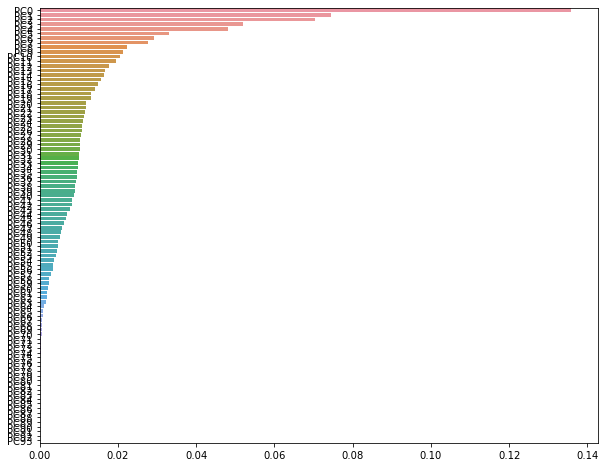

In [42]:
plt.figure(figsize = (10,8))
sn.barplot(x = pca.explained_variance_ratio_,y = ['PC' + str(i) for i in range(n_components)])

# Dimensionality Reduction (PCA)

In [43]:
n_components = 8

In [44]:
pca = PCA(n_components = n_components)


In [45]:
n_components =8
pca = PCA(n_components = n_components)
pca.fit(X_train)

X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index,columns = ['PC' + str(i) for i in range(n_components) ])
X_test_reduce = pd.DataFrame(pca.transform(X_test),index = X_test.index ,columns = ['PC'+ str(i) for i in range(n_components)])

In [46]:
X_train_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1841,4.175009,-1.768928,-0.974249,0.695343,1.352241,-1.519268,0.295352,-0.317846
4991,2.804349,-0.974193,-0.649423,-0.142564,-0.407856,-1.226533,0.472995,0.830736
742,0.921155,0.766535,0.159731,-1.409263,0.684550,0.764716,-0.164181,-0.063514
2141,0.552259,1.148299,0.337954,-2.750440,1.632143,-0.076308,0.498783,1.047222
6690,0.963378,-0.198799,-0.148634,0.079932,-1.195326,-0.948827,0.030893,-0.586502
...,...,...,...,...,...,...,...,...
3513,-1.417141,-0.965006,-0.469661,0.672222,2.896854,-3.265857,0.614508,-0.635754
4834,-1.530882,0.432993,0.138508,-0.902554,1.631464,-4.300203,1.132382,-0.774205
846,0.555196,0.244664,0.042151,-0.096286,-0.618523,-0.141604,-0.256698,-0.414744
1317,0.912730,-0.871724,-0.409193,1.081004,-1.362496,0.151853,-0.205037,-0.081581


In [47]:
X_test_reduce

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7
5346,1.278111,-0.570044,-0.399083,-0.614641,1.147081,0.232249,0.597018,1.324031
3693,-2.313292,1.020701,0.433664,-0.795213,1.981044,-1.592502,-0.567249,-2.604200
3720,-6.849520,0.196536,0.448758,2.155243,1.034521,-0.048479,-0.970483,-3.120347
2875,-0.503317,-0.540357,-0.250721,0.722943,-1.873828,-0.972699,0.173988,0.159594
3748,-0.839622,-0.919119,-0.488062,0.048635,1.496926,2.098981,-0.218988,2.302045
...,...,...,...,...,...,...,...,...
5214,2.113058,0.493283,-0.017437,-1.307362,0.585249,-2.088982,0.282995,-0.614117
2315,-2.712194,3.986584,1.766756,-3.255889,-0.464397,-1.787427,0.817853,-1.560737
5901,0.934991,-1.147115,-0.540635,0.695135,-0.033462,-1.086518,0.017712,0.560180
6076,-0.825003,0.152790,-0.006497,-0.273667,-0.169381,0.279686,0.181003,0.612353


In [48]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [49]:
pca.explained_variance_ratio_

array([0.13588059, 0.07457096, 0.07040779, 0.05190722, 0.04799016,
       0.03290431, 0.0291579 , 0.02768943])

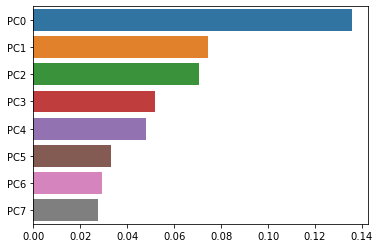

In [50]:
sn.barplot(x = pca.explained_variance_ratio_ ,y=['PC' + str(i) for i in range(n_components)] )

In [55]:
n_components = 6
pca = PCA(n_components = n_components)
pca.fit(X_train)
X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index,columns =['PC' + str(i)  for i in range(n_components)])
X_test_reduce = pd.DataFrame(pca.transform(X_test),index = X_test.index,columns =['PC' + str(i)  for i in range(n_components)])

In [56]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

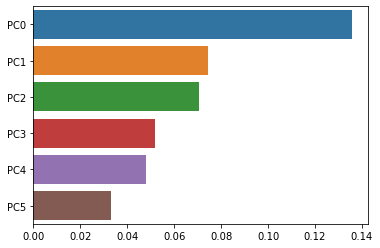

In [57]:
sn.barplot(x = pca.explained_variance_ratio_,y = ['PC'+ str(i) for i in range(n_components)])

In [58]:
n_components = 4
pca = PCA(n_components = n_components)
pca.fit(X_train)
X_train_reduce = pd.DataFrame(pca.transform(X_train),index = X_train.index,columns =['PC' + str(i)  for i in range(n_components)])
X_test_reduce = pd.DataFrame(pca.transform(X_test),index = X_test.index,columns =['PC' + str(i)  for i in range(n_components)])

In [59]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

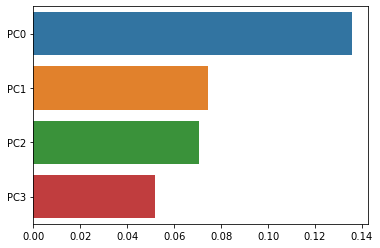

In [62]:
sn.barplot(pca.explained_variance_ratio_,y= ['PC'+ str(i) for i in range(n_components)])

In [71]:
reduce_models = {
    'Linear_Regression'   : LinearRegression(),
    'Logistic_Regression' : LogisticRegression(),
    'Linear_SVC'          : LinearSVC(),
    'SVC'                 : SVC(),
    'Decision_tree'       : DecisionTreeClassifier(),
    'Random_forest'       : RandomForestClassifier(),
    'GNB'                 : GaussianNB(),
     'Ridge'              : Ridge(),
     'Lasso'              : Lasso()
}
for name,model in reduce_models.items():
    model.fit(X_train_reduce,y_train)
    print(name + ' Trained')

Linear_Regression Trained
Logistic_Regression Trained


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear_SVC Trained
SVC Trained
Decision_tree Trained
Random_forest Trained
GNB Trained
Ridge Trained
Lasso Trained


In [72]:
for name,model in reduce_models.items():
    print(name + 'Accuracy : {:2f}'.format(model.score(X_test_reduce,y_test)))

Linear_RegressionAccuracy : 0.090401
Logistic_RegressionAccuracy : 0.965543
Linear_SVCAccuracy : 0.968475
SVCAccuracy : 0.969941
Decision_treeAccuracy : 0.950880
Random_forestAccuracy : 0.969208
GNBAccuracy : 0.957478
RidgeAccuracy : 0.090401
LassoAccuracy : -0.000474
